In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [2]:
#import ds
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#total rows and columns
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


No null,no duplicates but if you see skinthickness,bloodpressure and insulin at some places is 0 which is not possible hence treating those places with median value

In [7]:
columns_to_replace = ['BloodPressure', 'SkinThickness', 'Insulin']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)


In [8]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,NaN,NaN,0.0,0.232,54,1


In [9]:
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [10]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,29.0,125.0,0.0,0.232,54,1


<Axes: >

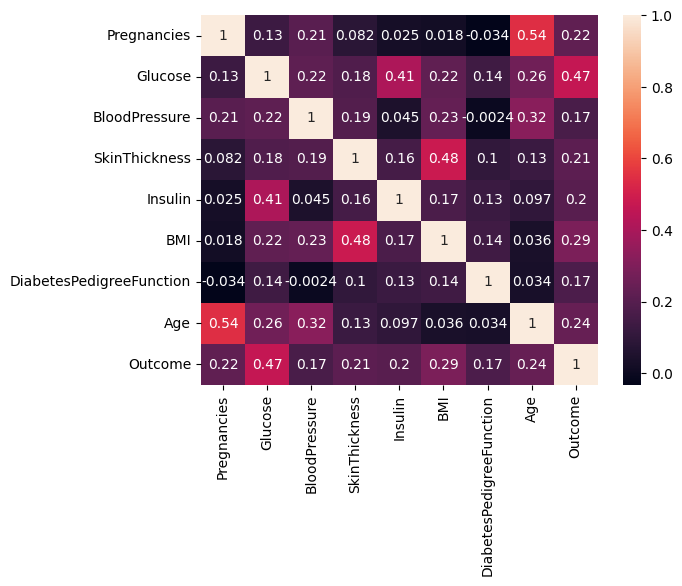

In [11]:
sns.heatmap(df.corr(),annot = True)
#Glucose is highly related to target variable outcome

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
#Standardization scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = True)

We will build a DNN model here.This will be a base model.from here everything we get from keras tuner we will replace it here.

model = Sequential()
model.add(Dense(32,activation = "relu",input_dim = 8))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "adam",loss = keras.losses.binary_crossentropy,metrics = ["accuracy"])

In [15]:
model = Sequential()
model.add(Dense(32,activation = "relu",input_dim = 8))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "adam",loss = keras.losses.binary_crossentropy,metrics = ["accuracy"])

In [16]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10,batch_size=32)

Epoch 1/10
20/20 [==============================] - 3s 15ms/step - loss: 0.7299 - accuracy: 0.4544 - val_loss: 0.6859 - val_accuracy: 0.5649
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6579 - accuracy: 0.6205 - val_loss: 0.6251 - val_accuracy: 0.6818
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6082 - accuracy: 0.6824 - val_loss: 0.5845 - val_accuracy: 0.7208
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5739 - accuracy: 0.7150 - val_loss: 0.5540 - val_accuracy: 0.7273
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7199 - val_loss: 0.5311 - val_accuracy: 0.7597
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5317 - accuracy: 0.7345 - val_loss: 0.5154 - val_accuracy: 0.7727
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5190 - accuracy: 0.7394 - val_loss: 0.5038 - val_accuracy: 0.7727
Epoch 8/10
20/20 [=

Hyperparameter - Keras Tuner

In [17]:
!pip install keras-tuner -q

In [18]:
#How to select appropriate optimizer
import kerastuner as kt

In [19]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32,activation = "relu",input_dim = 8))
  model.add(Dense(1,activation = "sigmoid"))
  optimizer = hp.Choice('optimizer',values = ['adam','adagrad','adadelta','rmsprop','SGD'])
  model.compile(optimizer = optimizer,loss = keras.losses.binary_crossentropy,metrics = ["accuracy"])
  return model


In [20]:
tuner = kt.RandomSearch(build_model,objective="val_accuracy",max_trials = 5)

Reloading Tuner from ./untitled_project/tuner0.json


In [21]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

In [22]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [23]:
#right no. of neurons in hidden layers

In [24]:
def build_model(hp):
  model = Sequential()
  units = hp.Int("Units",8,256,step = 8)
  model.add(Dense(units = units,activation = "relu",input_dim = 8))
  model.add(Dense(1,activation = "sigmoid"))
  model.compile(optimizer = "adam",loss = keras.losses.binary_crossentropy,metrics = ["accuracy"])
  return model


In [25]:
tuner = kt.RandomSearch(build_model,objective="val_accuracy",max_trials = 5,directory = "mydir",project_name="Neurons")

Reloading Tuner from mydir/Neurons/tuner0.json


In [26]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

In [27]:
tuner.get_best_hyperparameters()[0].values

{'Units': 72}

In [28]:
#No of layers?
def build_model(hp):
  model = Sequential()
  model.add(Dense(units = 72,activation = "relu",input_dim = 8))
  for i in range(hp.Int('num_layers',min_value = 1,max_value = 10)):
    model.add(Dense(units = 72,activation = "relu"))
  model.add(Dense(1,activation = "sigmoid"))
  model.compile(optimizer = "adam",loss = keras.losses.binary_crossentropy,metrics = ["accuracy"])
  return model

In [29]:
tuner = kt.RandomSearch(build_model,objective="val_accuracy",max_trials = 5,directory = "mydir",project_name="Hlayers")

Reloading Tuner from mydir/Hlayers/tuner0.json


In [30]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

In [31]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4}

HL : 4 , Neurons = 72 , opt = adam , act fn = relu (Not used hyperparameter)learning rate,dropout value,batch size can also be found out using keras tuner,lets use this and build a model

In [32]:
model1 = Sequential()
model1.add(Dense(72,activation = "relu",input_dim = 8))
model1.add(Dense(72,activation = "relu"))
model1.add(Dense(72,activation = "relu"))
model1.add(Dense(72,activation = "relu"))
model1.add(Dense(72,activation = "relu"))
model1.add(Dense(1,activation = "sigmoid"))
model1.compile(optimizer = "adam",loss = keras.losses.binary_crossentropy,metrics = ["accuracy"])

In [33]:
model1.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 20,batch_size=32)

Epoch 1/20
20/20 [==============================] - 3s 23ms/step - loss: 0.6161 - accuracy: 0.6678 - val_loss: 0.5105 - val_accuracy: 0.7662
Epoch 2/20
20/20 [==============================] - 0s 12ms/step - loss: 0.4957 - accuracy: 0.7492 - val_loss: 0.4779 - val_accuracy: 0.7727
Epoch 3/20
20/20 [==============================] - 0s 9ms/step - loss: 0.4659 - accuracy: 0.7785 - val_loss: 0.4922 - val_accuracy: 0.7532
Epoch 4/20
20/20 [==============================] - 0s 10ms/step - loss: 0.4472 - accuracy: 0.7915 - val_loss: 0.4781 - val_accuracy: 0.7922
Epoch 5/20
20/20 [==============================] - 0s 9ms/step - loss: 0.4416 - accuracy: 0.7866 - val_loss: 0.4750 - val_accuracy: 0.7857
Epoch 6/20
20/20 [==============================] - 0s 9ms/step - loss: 0.4272 - accuracy: 0.7948 - val_loss: 0.4863 - val_accuracy: 0.7857
Epoch 7/20
20/20 [==============================] - 0s 12ms/step - loss: 0.4321 - accuracy: 0.7980 - val_loss: 0.4786 - val_accuracy: 0.7922
Epoch 8/20
20/20

In [34]:
#all in on go

def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers',min_value = 1,max_value = 10)):
    if counter == 0:
      model.add(Dense(hp.Int('units'+ str(i),min_value = 8,max_value = 128,step = 8),activation = hp.Choice("activation"+str(i),values = ['relu','leakyrelu','softmax','sigmoid'])
      ,input_dim = 8))
      model.add(Dropout(hp.Choice('Dropout'+str(i),values = [0.1,0.2,0.3,0.4,0.5])))
    else:
      model.add(Dense(hp.Int('units'+ str(i),min_value = 8,max_value = 128,step = 8),activation = hp.Choice("activation"+str(i),values = ['relu','leakyrelu','softmax','sigmoid'])))
      model.add(Dropout(hp.Choice('Dropout'+str(i),values = [0.1,0.2,0.3,0.4,0.5])))
      counter = counter + 1
    model.add(Dense(1,activation = "sigmoid"))
    model.compile(optimizer = hp.Choice("optimizer",values = ["SGD","rmsprop","adam","adagrad"]),loss = keras.losses.binary_crossentropy,metrics = ["accuracy"])
    return model



In [35]:
tuner = kt.RandomSearch(build_model,objective="val_accuracy",max_trials = 10,directory = "mydir",project_name="allinone")

In [36]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 34s


In [37]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'units0': 64,
 'activation0': 'relu',
 'Dropout0': 0.2,
 'optimizer': 'adam'}